In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.shape # 178 rows and 14 columns

(178, 14)

In [5]:
df.describe() # no such extreme values (signs of outliers) will see them in further analysis.

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# checking for null values

In [7]:
df.isna().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [8]:
# As we are seeing there are no no missing values in df

In [9]:
df.dtypes
 # all the variables are numeric

,0
Type,int64
Alcohol,float64
Malic,float64
Ash,float64
Alcalinity,float64
Magnesium,int64
Phenols,float64
Flavanoids,float64
Nonflavanoids,float64
Proanthocyanins,float64


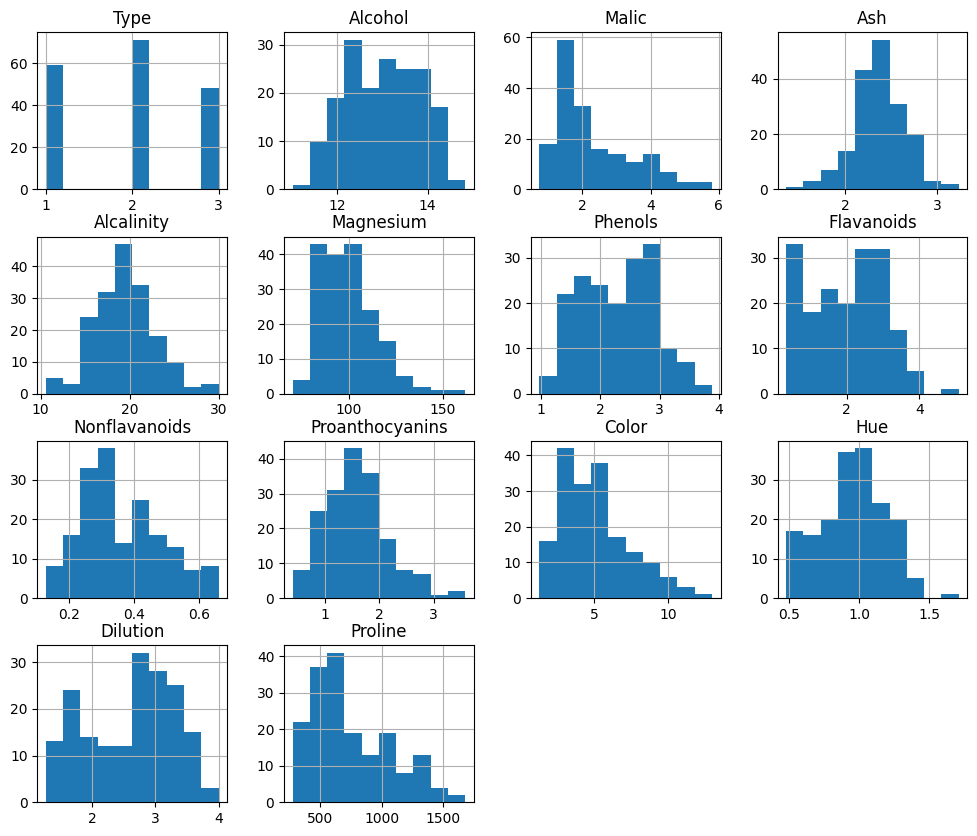

In [10]:
df.hist(figsize=(12, 10))
plt.show()

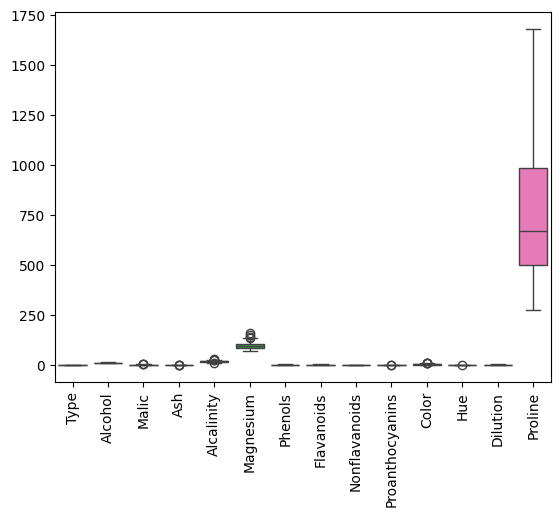

In [11]:
# Box plots for numerical features
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [12]:
# as seeing there are outliers in Ash, Alcalinity, Magnesium, Proanthocyanims, Color, Hue.

outlier treatment

In [13]:
for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         df[column].median(), df[column])

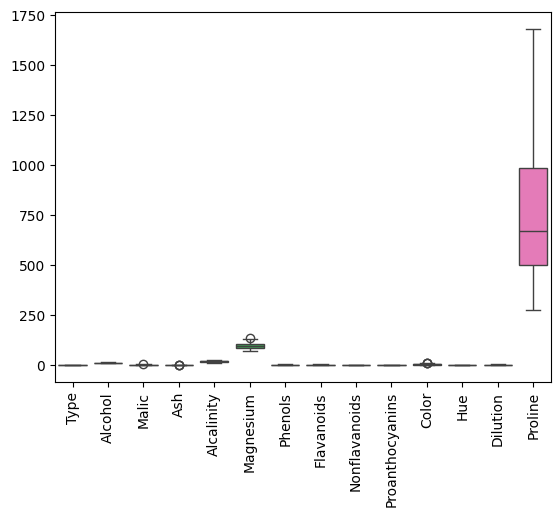

In [14]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

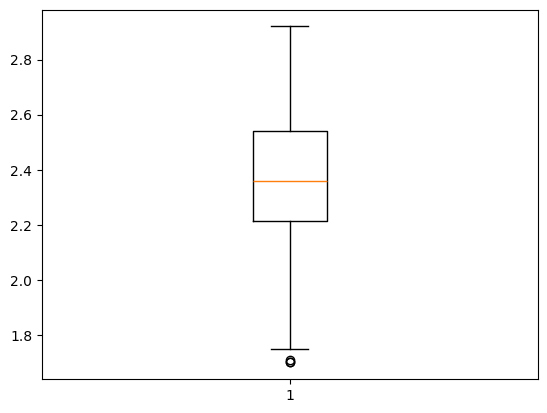

In [15]:
plt.boxplot(df['Ash'])
plt.show() # outlier below lower extreme

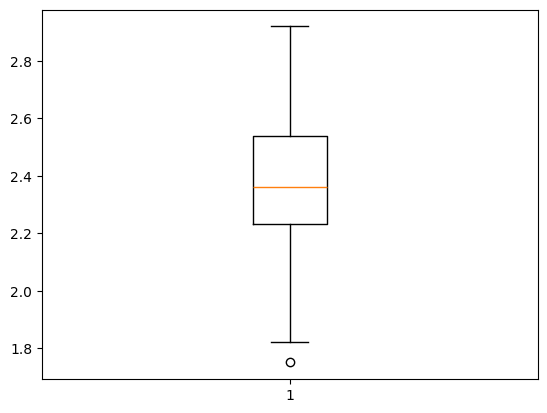

In [16]:
# for managing outiler of ash column

# Calculate the IQR for the 'Ash' column
Q1_ash = df['Ash'].quantile(0.25)
Q3_ash = df['Ash'].quantile(0.75)
IQR_ash = Q3_ash - Q1_ash

# Define the bounds for outlier detection
lower_bound_ash = Q1_ash - 1.5 * IQR_ash
upper_bound_ash = Q3_ash + 1.5 * IQR_ash

# Instead of replacing with the median of the entire column,
# replace outliers with the median of the 'Ash' column itself
df['Ash'] = np.where((df['Ash'] < lower_bound_ash) | (df['Ash'] > upper_bound_ash),
                     df['Ash'].median(), df['Ash'])

# Now plot the boxplot for 'Ash' again to see the effect.
plt.boxplot(df['Ash'])
plt.show()

Calculate the correlation matrix:



In [17]:
correlation_matrix = df.corr()


In [18]:
# visualization

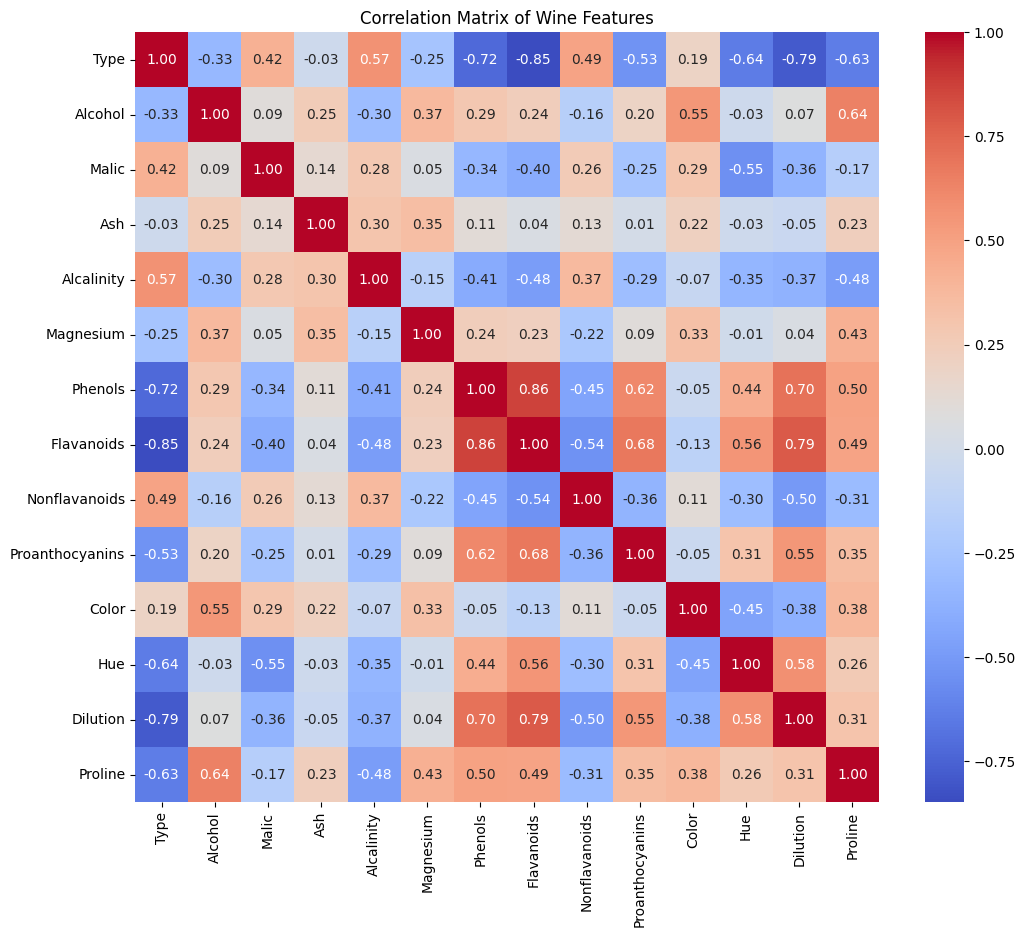

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [20]:
# therre is strong negative correlation in between Flavanoids and Type , Type and Dilution.
# and strong positive btw phenols and flavanoids , flavanoids and dilution etc

Standardzation


In [21]:
#import libraries
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [23]:
scaled_features

array([[-1.21394365,  1.51861254, -0.5476409 , ...,  0.392826  ,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.47949003, ...,  0.43811587,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.08518858, ...,  0.34753614,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.95446953, ..., -1.6452181 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.30911287, ..., -1.59992823,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.77922444, ..., -1.55463836,
        -1.42894777, -0.59516041]])

Determine the optimal number of principal components

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=5)

# Fit the PCA object to the scaled features
pca_components = pca.fit_transform(scaled_features)



# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance


array([0.40371737, 0.5910747 , 0.67858974, 0.74404837, 0.80004449])

In [25]:
# Explained variance

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.40371737, 0.18735733, 0.08751504, 0.06545863, 0.05599613])

In [26]:
pca.components_


array([[ 0.38953238, -0.14761342,  0.20868762, -0.00667477,  0.25981976,
        -0.11871849, -0.3572812 , -0.38952331,  0.25980403, -0.2859704 ,
         0.05552418, -0.27648263, -0.34483088, -0.27237834],
       [ 0.0098878 ,  0.46478756,  0.24607574,  0.29781976, -0.04460677,
         0.37418993,  0.03447958, -0.02585948,  0.02830997, -0.0043523 ,
         0.51993855, -0.25178991, -0.18069362,  0.35150338],
       [-0.02322445, -0.1383659 ,  0.03399808,  0.70561971,  0.55218795,
         0.1749617 ,  0.13626435,  0.09692717,  0.14994681,  0.08452459,
        -0.21718709,  0.12505703,  0.12772577, -0.09498766],
       [ 0.10020155, -0.064368  ,  0.52208771, -0.1680908 ,  0.16674708,
        -0.14749556,  0.20858824,  0.17372391, -0.25040226,  0.46016286,
         0.04861534, -0.43969645,  0.19615714, -0.23046159],
       [-0.02389625,  0.21758988, -0.05853121,  0.05594   ,  0.0034169 ,
        -0.62808997,  0.11114847,  0.04484715,  0.63013031,  0.30584938,
         0.16215859,  0.06

In [27]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [29]:
pc_df = pd.DataFrame(data= pca_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df# here are the top 5 principal components

,PC1,PC2,PC3,PC4,PC5
0,-3.664636,1.640180,0.023176,0.007507,-0.729936
1,-2.650024,-0.276697,-2.073984,-0.693027,-0.511367
2,-2.864549,0.992569,1.079194,0.890890,0.805674
3,-4.046453,2.788066,-0.091697,0.689026,0.256454
4,-1.406363,1.086918,2.505687,-0.132338,-0.420660
...,...,...,...,...,...
173,2.859802,1.605567,-0.566459,-0.833487,0.857146
174,2.972752,2.002384,0.230084,0.623135,0.070176
175,2.961518,3.262381,-1.149332,0.690380,-0.816151
176,2.683377,2.721973,-0.593372,-0.357609,-0.204912


clustering with original dataset

>



In [30]:
# importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 3  # defining no of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_
df['cluster'] = labels

In [31]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1.0,14.23,1.710,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,1.0,13.20,1.780,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,1.0,13.16,2.360,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,1.0,14.37,1.950,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,1.0,13.24,2.590,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,13.71,1.865,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0
174,3.0,13.40,3.910,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0
175,3.0,13.27,4.280,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,3.0,13.17,2.590,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


Visualize the clustering results:

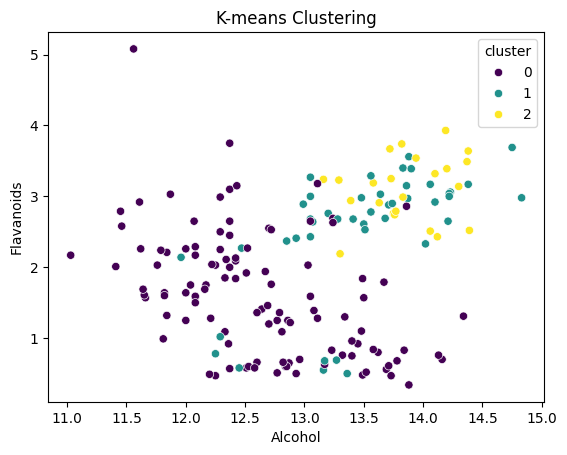

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two features, colored by cluster
sns.scatterplot(x='Alcohol', y='Flavanoids', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering')
plt.show()

# You can create similar plots for other pairs of features.
# Consider using PCA to reduce dimensionality for visualization if you have many features.

Evaluate clustering performance

In [33]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.586350608897348


Clustering with PCA Data:

In [34]:
#Apply K-means to PCA-transformed data:

In [35]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pc_df)
labels_pca = kmeans_pca.labels_
pc_df['cluster_pca'] = labels_pca

In [36]:
pc_df

,PC1,PC2,PC3,PC4,PC5,cluster_pca
0,-3.664636,1.640180,0.023176,0.007507,-0.729936,2
1,-2.650024,-0.276697,-2.073984,-0.693027,-0.511367,2
2,-2.864549,0.992569,1.079194,0.890890,0.805674,2
3,-4.046453,2.788066,-0.091697,0.689026,0.256454,2
4,-1.406363,1.086918,2.505687,-0.132338,-0.420660,2
...,...,...,...,...,...,...
173,2.859802,1.605567,-0.566459,-0.833487,0.857146,1
174,2.972752,2.002384,0.230084,0.623135,0.070176,1
175,2.961518,3.262381,-1.149332,0.690380,-0.816151,1
176,2.683377,2.721973,-0.593372,-0.357609,-0.204912,1


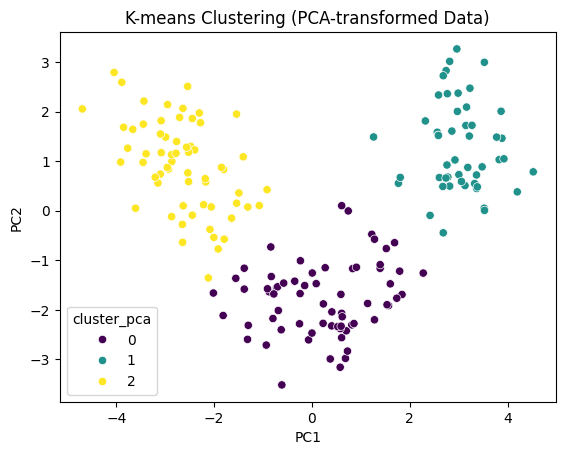

In [37]:
# Visualization
# Scatter plot of two principal components, colored by cluster
sns.scatterplot(x='PC1', y='PC2', hue='cluster_pca', data=pc_df, palette='viridis')
#or sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=df, palette='viridis') if you added the column to the original df
plt.title('K-means Clustering (PCA-transformed Data)')
plt.show()

In [38]:
# Calculate silhouette scores for both datasets
silhouette_original = silhouette_score(df, labels_pca)
silhouette_pca = silhouette_score(pc_df[['PC1', 'PC2', 'PC3']], labels_pca)
silhouette_pca   # Silhouette pca

0.4889127615086156

In [39]:
silhouette_original  # original Silhouette

0.18905216840857927

Comparison and Analysis:

In [40]:
#Quantitative Comparison:

#Silhouette Score: Compare the silhouette scores calculated for both datasets.
## A higher silhouette score indicates better-defined and well-separated clusters.
## If the silhouette score for the PCA-transformed data is higher than the original data,
##it suggests that PCA has improved the clustering performance.

# Visual Comparison:
# see for the clusters of original dataframe and pca dataframe you will see how well
## the clusters are made.

In [41]:
# Discuss any similarities or differences observed in the clustering results
#Similarities:
##Overall Cluster Structure: In many cases, the overall cluster structure might be preserved after PCA.

#Differences:
##Cluster Boundaries: PCA can lead to shifts in cluster boundaries due to dimensionality reduction

In [42]:
# trade-offs between using PCA and clustering directly on the original dataset.

#Overall, the choice between using PCA and clustering directly on the original
##data depends on the specific characteristics of your dataset and your analysis goals.
##Carefully consider the trade-offs and choose the approach that best balances
##dimensionality reduction, information retention, computational cost,
## interpretability, and robustness to noise and outliers.

Colclusion

In [43]:


# ****************************Conclusion*********************

# The analysis of the wine dataset revealed distinct clusters using both K-means
## clustering on the original data and on the principal components obtained
## through PCA.  The silhouette scores offer a quantitative measure of cluster
## quality, indicating the relative effectiveness of each approach.
##  Visualizations of the clusters based on key features and principal
##components further illuminate the separation and composition of the groups.
##While both methods effectively identify clusters, comparing the silhouette
##scores and visualisations can suggest whether dimensionality reduction through
## PCA has improved clustering performance or whether the original dataset
## offers a more robust clustering solution.


#### Recommendation
# use pca when data is high dimentional , presence of noise and outliers,
# computational efficiency

#******************************************************************************